<a href="https://colab.research.google.com/github/marcelocoi/DeOldify/blob/master/Color_coi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **<font color='blue'> Artistic Colorizer </font>**

#◢ Color_coi - Colorizando suas próprias imagens!

####**Credits:**

Special thanks to:

Matt Robinson and María Benavente for pioneering the DeOldify image colab notebook. 
Marcelo Barros  

Dana Kelley for doing things, breaking stuff & having an opinion on everything.



---


#◢ Verify Correct Runtime Settings

**<font color='#FF000'> IMPORTANT </font>**

In the "Runtime" menu for the notebook window, select "Change runtime type." Ensure that the following are selected:
* Runtime Type = Python 3
* Hardware Accelerator = GPU 


#◢ Git clone and install DeOldify

In [2]:
!git clone https://github.com/marcelocoi/DeOldify.git DeOldify 

fatal: destination path 'DeOldify' already exists and is not an empty directory.


In [3]:
cd DeOldify

/content/DeOldify


#◢ Setup

In [4]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

In [5]:
!pip install -r colab_requirements.txt

In [6]:
import fastai
from deoldify.visualize import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

In [7]:
!mkdir 'models'
!wget https://www.dropbox.com/s/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth?dl=0 -O ./models/ColorizeArtistic_gen.pth

mkdir: cannot create directory ‘models’: File exists
--2020-09-15 08:59:57--  https://www.dropbox.com/s/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.1, 2620:100:6024:1::a27d:4401
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth [following]
--2020-09-15 08:59:57--  https://www.dropbox.com/s/raw/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucff61f38b09cf507a8abf988bc6.dl.dropboxusercontent.com/cd/0/inline/A_Z66W4YJNYhwXItgLwu6lByQH7cyRtDMgRQozl1hu_WtXL36D0RwyK-Tvn7212rxMDX-6IdG4PFBDy4HCMHqbbtHC9dUdPVvQYzbVmYjmQckw/file# [following]
--2020-09-15 08:59:57--  https://ucff61f38b09cf507a8abf988bc6.dl.dropboxusercontent.com/cd/0/inline/A_Z66W4YJNYhwXItgLwu6lByQH7cyRtDMgRQoz

In [8]:
!wget https://github.com/marcelocoi/DeOldify/blob/master/resource_images/watermark.png -O ./resource_images/watermark.png

--2020-09-15 09:00:19--  https://github.com/marcelocoi/DeOldify/blob/master/resource_images/watermark.png
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘./resource_images/watermark.png’

./resource_images/w     [ <=>                ]  79.11K  --.-KB/s    in 0.02s   

2020-09-15 09:00:20 (3.46 MB/s) - ‘./resource_images/watermark.png’ saved [81012]



In [9]:
colorizer = get_image_colorizer(artistic=True)

#◢ Instructions

### source_url
Type in a url to a direct link of an image.  Usually that means they'll end in .png, .jpg, etc. NOTE: If you want to use your own image, upload it first to a site like Imgur. 

### render_factor
The default value of 35 has been carefully chosen and should work -ok- for most scenarios (but probably won't be the -best-). This determines resolution at which the color portion of the image is rendered. Lower resolution will render faster, and colors also tend to look more vibrant. Older and lower quality images in particular will generally benefit by lowering the render factor. Higher render factors are often better for higher quality images, but the colors may get slightly washed out. 

### watermarked
Selected by default, this places a watermark icon of a palette at the bottom left corner of the image.  This is intended to be a standard way to convey to others viewing the image that it is colorized by AI. We want to help promote this as a standard, especially as the technology continues to improve and the distinction between real and fake becomes harder to discern. This palette watermark practice was initiated and lead by the company MyHeritage in the MyHeritage In Color feature (which uses a newer version of DeOldify than what you're using here).

#### How to Download a Copy
Simply right click on the displayed image and click "Save image as..."!

## Pro Tips

You can evaluate how well the image is rendered at each render_factor by using the code at the bottom (that cell under "See how well render_factor values perform on a frame here"). 

#◢ Colorize!!

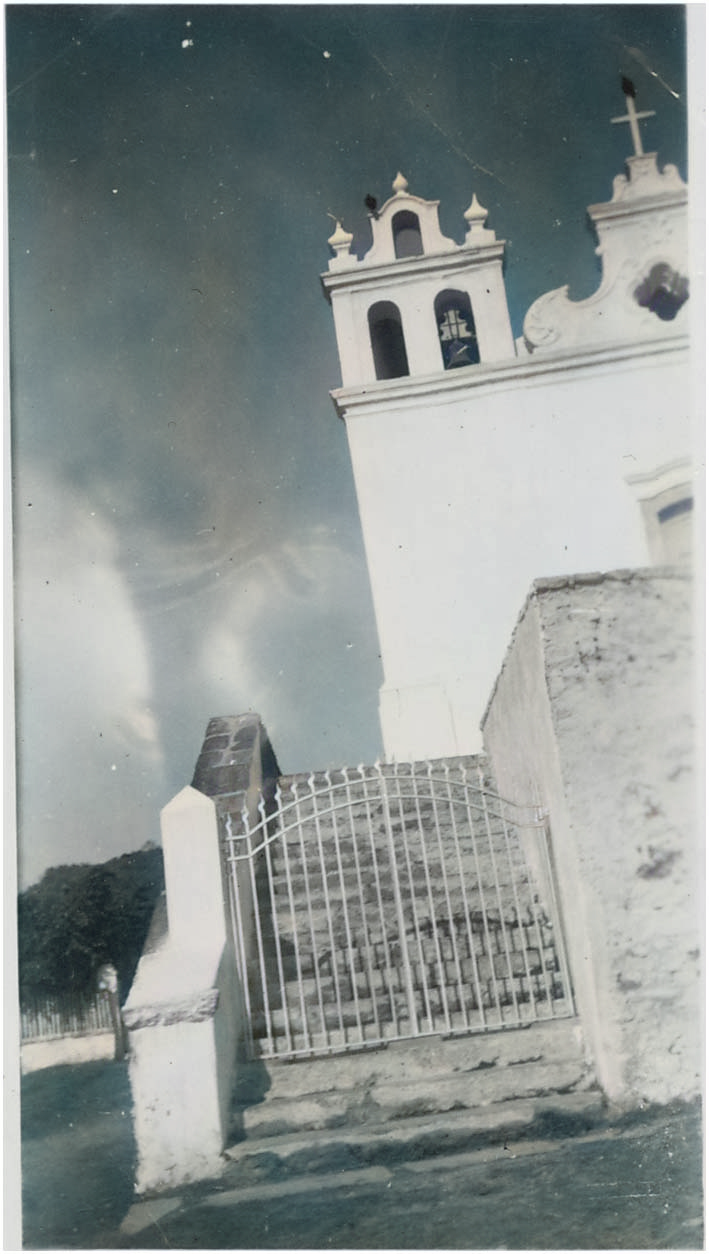

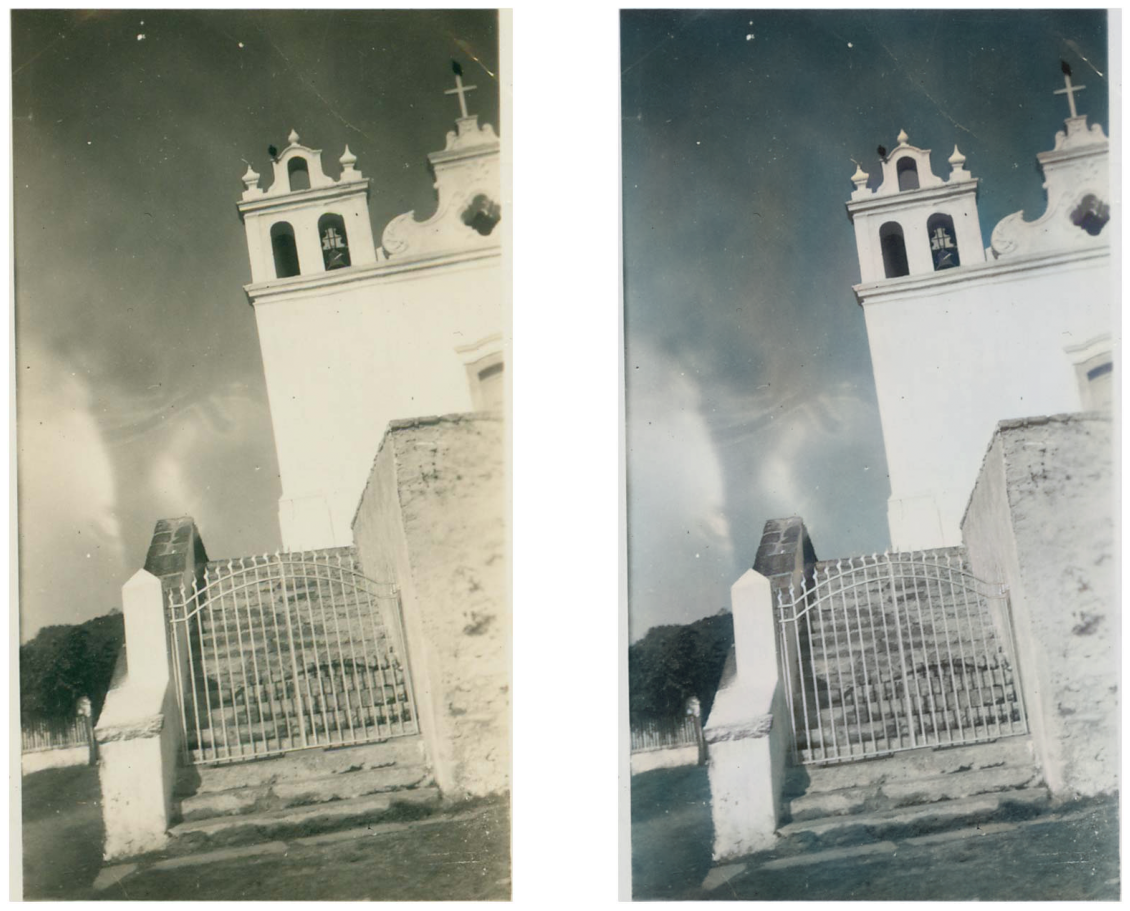

In [10]:
source_url = 'https://biblioteca.ibge.gov.br/visualizacao/fotografias/GEBIS%20-%20RJ/rj46862.jpg' #@param {type:"string"}
render_factor = 50 #@param {type:"slider", min:7, max:55, step:1}
watermarked = False #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

## See how well render_factor values perform on the image here

In [ ]:
for i in range(10,40,2):
    colorizer.plot_transformed_image('test_images/image.png', render_factor=i, display_render_factor=True, figsize=(30,30))

---
#⚙ Recommended image sources 
* [/r/TheWayWeWere](https://www.reddit.com/r/TheWayWeWere/)